## 라이브러리 임포트

In [ ]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


## 데이터 불러오기

In [ ]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

In [ ]:
'''
데이터는 2017년 1분기부터 2022년 4분기까지의 자료
컬럼은 많음
분기당 총 매출액, 총 점포수를 예측하고자 함.
''

In [ ]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'월요일_매출_금액' : '월요매출금액',
                          '화요일_매출_금액' : '화요매출금액',
                          '수요일_매출_금액' : '수요매출금액',
                          '목요일_매출_금액' : '목요매출금액',
                          '금요일_매출_금액' : '금요매출금액',
                          '토요일_매출_금액' : '토요매출금액',
                          '일요일_매출_금액' : '일요매출금액',
                          '남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '00~06시_매출_금액' : '00~06시 매출',
                          '06~11시_매출_금액' : '06~11시 매출',
                          '11~14시_매출_금액' : '11~14시 매출',
                          '14~17시_매출_금액' : '14~17시 매출',
                          '17~21시_매출_금액' : '17~21시 매출',
                          '21~24시_매출_금액' : '21~24시 매출',
                          '연령대_10_매출_금액' : '10대 매출',
                          '연령대_20_매출_금액' : '20대 매출',
                          '연령대_30_매출_금액' : '30대 매출',
                          '연령대_40_매출_금액' : '40대 매출',
                          '연령대_50_매출_금액' : '50대 매출',
                          '연령대_60_이상_매출_금액' : '60대 이상 매출',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [ ]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True)

# 신촌동만 남김
df_sin = df[df.행정동=='신촌동']

# 신촌동에 중분류 업종 중 '주유', '여행', '기술', '정비/수리' 는 18년도에만 매출이 찍혀있으므로, 제외하도록 하자.
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '주유'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '여행'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '기술'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '정비/수리'].index).reset_index().drop('index', axis=1)

# df_sin

In [ ]:
# 분기별 업종별 매출금액 합치기

df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '행정동', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


# 소매 카테고리만 남기기
df_sin_sell_quarter = df_sin_quarter[df_sin_quarter.대분류 == '소매'].reset_index().drop('index', axis=1)


# 서비스 카테고리만 남기기
df_sin_service_quarter = df_sin_quarter[df_sin_quarter.대분류 == '서비스'].reset_index().drop('index', axis=1)


# 외식 카테고리만 남기기
df_sin_food_quarter = df_sin_quarter[df_sin_quarter.대분류 == '외식'].reset_index().drop('index', axis=1)

df_sin_food_quarter

<ipython-input-7-668ae626bacd>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '행정동', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,대분류,중분류,행정동,업종명,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,외식,식사류,신촌동,분식전문점,7465646911,240,9,12
1,2017-1,외식,식사류,신촌동,양식음식점,8789402761,144,6,5
2,2017-1,외식,식사류,신촌동,일식음식점,9021124950,96,4,4
3,2017-1,외식,식사류,신촌동,중식음식점,4643747978,49,1,0
4,2017-1,외식,식사류,신촌동,치킨전문점,2722568190,50,1,3
...,...,...,...,...,...,...,...,...,...
235,2022-4,외식,식사류,신촌동,패스트푸드점,3057584360,83,0,4
236,2022-4,외식,식사류,신촌동,한식음식점,29617724330,435,8,12
237,2022-4,외식,주류,신촌동,호프-간이주점,7366806532,171,1,6
238,2022-4,외식,카페/베이커리,신촌동,제과점,1302230221,48,3,2


In [ ]:
# 외식에서 대분류 기준으로만 해보자.

sin_food_quarter = df_sin_food_quarter.groupby(['분기', '대분류'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()
sin_food_quarter

<ipython-input-8-69463d3ebe64>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sin_food_quarter = df_sin_food_quarter.groupby(['분기', '대분류'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,대분류,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,외식,102508245733,1812,65,76
1,2017-2,외식,109235403139,1802,68,78
2,2017-3,외식,104128788501,1776,67,93
3,2017-4,외식,109516908327,1746,43,75
4,2018-1,외식,102766866923,1713,54,87
5,2018-2,외식,113435447338,1710,63,66
6,2018-3,외식,105996087122,1719,86,73
7,2018-4,외식,125238108654,1709,78,88
8,2019-1,외식,85131378213,1680,51,72
9,2019-2,외식,81560674424,1693,88,66


In [ ]:
# 개업률, 폐업률, 순점포증감률 추가

sin_food_quarter['개업률'] = (sin_food_quarter['개업점포수'] / sin_food_quarter['총 점포수']) * 100
sin_food_quarter['폐업률'] = (sin_food_quarter['폐업점포수'] / sin_food_quarter['총 점포수']) * 100
sin_food_quarter['순점포증감률'] = ((sin_food_quarter['개업점포수'] - sin_food_quarter['폐업점포수']) / sin_food_quarter['총 점포수']) * 100

sin_food_quarter

,분기,대분류,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,개업률,폐업률,순점포증감률
0,2017-1,외식,102508245733,1812,65,76,3.587196,4.194260,-0.607064
1,2017-2,외식,109235403139,1802,68,78,3.773585,4.328524,-0.554939
2,2017-3,외식,104128788501,1776,67,93,3.772523,5.236486,-1.463964
3,2017-4,외식,109516908327,1746,43,75,2.462772,4.295533,-1.832761
4,2018-1,외식,102766866923,1713,54,87,3.152364,5.078809,-1.926445
5,2018-2,외식,113435447338,1710,63,66,3.684211,3.859649,-0.175439
6,2018-3,외식,105996087122,1719,86,73,5.002909,4.246655,0.756254
7,2018-4,외식,125238108654,1709,78,88,4.564073,5.149210,-0.585138
8,2019-1,외식,85131378213,1680,51,72,3.035714,4.285714,-1.250000
9,2019-2,외식,81560674424,1693,88,66,5.197874,3.898405,1.299468


## 데이터 전처리 및 시각화

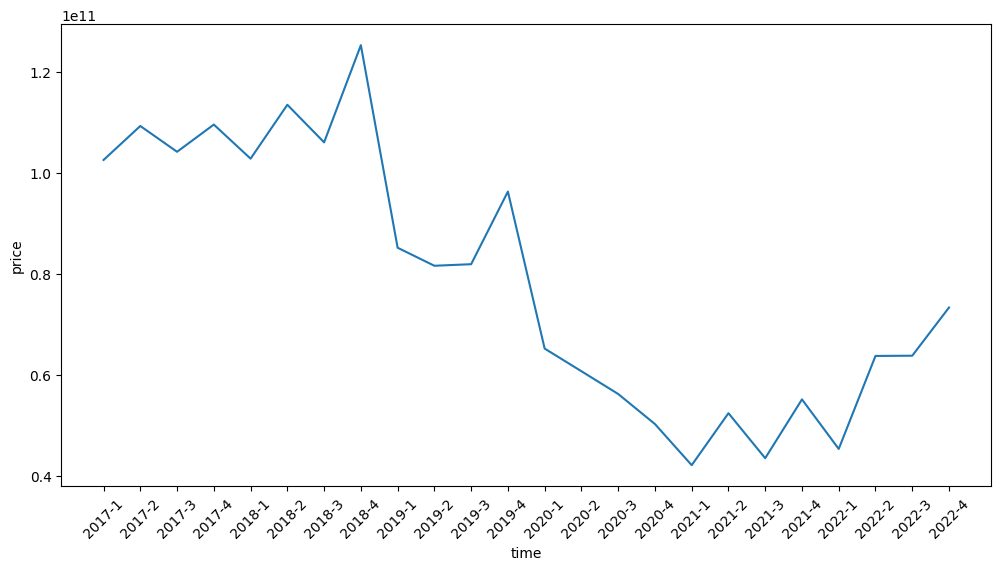

In [ ]:
### seaborn lineplot을 이용, 전체 주가 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=sin_food_quarter['분기'], y=sin_food_quarter['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

In [ ]:
# 총 매출액을 예측하기 위한 지표로는 총 점포수, 순점포증감률 2개 선정.

### X / y 데이터 생성
X = sin_food_quarter[['총 점포수', '순점포증감률']]
y = sin_food_quarter.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

    총 점포수    순점포증감률
0    1812 -0.607064
1    1802 -0.554939
2    1776 -1.463964
3    1746 -1.832761
4    1713 -1.926445
5    1710 -0.175439
6    1719  0.756254
7    1709 -0.585138
8    1680 -1.250000
9    1693  1.299468
10   1688 -1.184834
11   1663 -0.360794
12   1674 -0.716846
13   1678 -0.178784
14   1654 -1.511487
15   1629 -1.780233
16   1621 -0.555213
17   1629  0.491099
18   1620 -0.370370
19   1613 -0.867948
20   1618  0.309023
21   1623  1.293900
22   1607 -0.435594
23   1603 -0.748596
--------------------------------------------------------------------------------
       분기당_매출_금액
0   102508245733
1   109235403139
2   104128788501
3   109516908327
4   102766866923
5   113435447338
6   105996087122
7   125238108654
8    85131378213
9    81560674424
10   81870161027
11   96245969340
12   65164860002
13   60676986544
14   56171897019
15   50224298683
16   42076766557
17   52369141953
18   43457753891
19   55103720348
20   45293552454
21   63704593744
22   63752500200
23   732919

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 2)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [ ]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의

'''
1. window_size(time step, 시간 간격) 정의
   (1) 얼마 동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter
   (2) 과거 10일을 기반으로 내일 데이터를 예측한다라고 가정했을 때 window_size(시간 간격) = 10이 된다
   (3) 목표 : 과거 10일을 기준으로 그 다음날의 '종가'를 예측할 수 있는 데이터 생성
2.. 순차적으로 10일 동안의 데이터를 하나의 데이터로 묶고,
3. 이에 맞는 label(예측 데이터) 생성
'''

def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)

In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=5인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 2)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [ ]:
### 학습용 / 평가용 데이터 생성

'''
# TEST_SIZE 설정
   (1) TEST_SIZE = 20으로 설정
   (2) TEST_SIZE = 20은 가장 최근 20분기의 데이터로 모델이 매출액을 예측
   (3) 학습은 과거부터 20분기 이전의 데이터를 학습
'''

## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 20

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
print(f'검증용 데이터의 모양 : {X_valid.shape}')
print('-'*80)
print(f'검증용 레이블의 모양 : {y_valid.shape}')
print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (2, 2, 2)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (2, 1)
--------------------------------------------------------------------------------
검증용 데이터의 모양 : (4, 2, 2)
--------------------------------------------------------------------------------
검증용 레이블의 모양 : (4, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (20, 2, 2)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (20, 1)
X_train의 모양 : (2, 2, 2)
--------------------------------------------------------------------------------
y_train의 모양 : (2, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (20, 2, 2)
--------------------------------------------------------------------------------
y_test의 모양 : (20, 1)


## LSTM을 이용한 매출 예측 모델 생성

In [ ]:
'''
모델 정의, feature 데이터의 복잡도가 그렇게 크지 않고 학습해야할 데이터도 10,000개 이하 수준이기 때문에
아주 단순한 모델로도 충분히 좋은 성능을 기대해 볼 수 있습니다. 오히려 너무 복잡한 모델이 과적합을
유발하고, 학습도 잘 되지 못하는 결과를 낳을 수 있다.
'''

# 필요한 라이브러리 임폴트
import tensorflow as tf

# 랜덤 시드 설정
tf.random.set_seed(99)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                                return_sequences=True,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32))
model.add(tf.keras.layers.Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17152     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint]
                   )

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5274
Epoch 1: val_loss improved from inf to 0.60897, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.5274 - val_loss: 0.6090
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5063
Epoch 2: val_loss improved from 0.60897 to 0.58757, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.5063 - val_loss: 0.5876
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4854
Epoch 3: val_loss improved from 0.58757 to 0.56625, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.4854 - val_loss: 0.5663
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4647
Epoch 4: val_loss improved from 0.56625 to 0.54500, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.4647 - val_loss: 0.5450
Epoch 5/100
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.65437436]
 [0.5539257 ]
 [0.54747236]
 [0.68920624]
 [0.71371335]
 [0.56885844]
 [0.56866604]
 [0.6688787 ]
 [0.5128079 ]
 [0.52101046]
 [0.53599286]
 [0.5169188 ]
 [0.37553838]
 [0.3525737 ]
 [0.44672182]
 [0.48932302]
 [0.40556157]
 [0.4033426 ]
 [0.51226825]
 [0.5162327 ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_food_quarter.iloc[-20:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2018-1,0.729787,0.654374
2018-2,0.858075,0.553926
2018-3,0.768618,0.547472
2018-4,1.000000,0.689206
2019-1,0.517724,0.713713
2019-2,0.474787,0.568858
2019-3,0.478508,0.568666
2019-4,0.651375,0.668879
2020-1,0.277630,0.512808


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_food_quarter.iloc[-len(pred):, 8].values
df_test['predict_origin'] = predict_inverse

error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2018-1,0.729787,0.654374,-1.926445,9.649542e+10,-9.649542e+10
2018-2,0.858075,0.553926,-0.175439,8.814196e+10,-8.814196e+10
2018-3,0.768618,0.547472,0.756254,8.760531e+10,-8.760531e+10
2018-4,1.000000,0.689206,-0.585138,9.939209e+10,-9.939209e+10
2019-1,0.517724,0.713713,-1.250000,1.014301e+11,-1.014301e+11
2019-2,0.474787,0.568858,1.299468,8.938380e+10,-8.938380e+10
2019-3,0.478508,0.568666,-1.184834,8.936780e+10,-8.936780e+10
2019-4,0.651375,0.668879,-0.360794,9.770162e+10,-9.770162e+10
2020-1,0.277630,0.512808,-0.716846,8.472256e+10,-8.472256e+10


In [ ]:
df_test = df_test.reset_index()

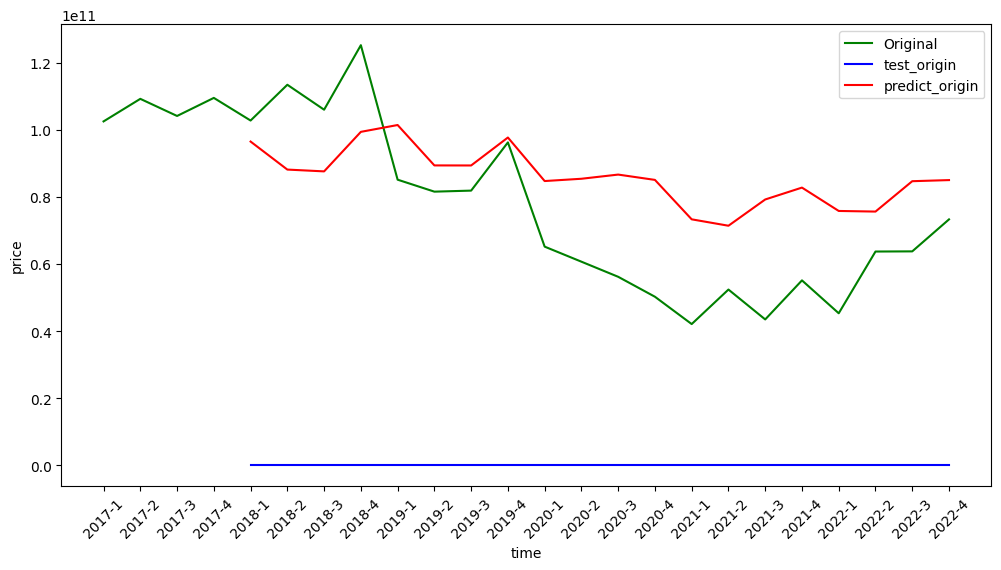

In [ ]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_food_quarter['분기'], sin_food_quarter['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    1.000000e+01
mean    -8.638543e+10
std      7.393565e+09
min     -9.571945e+10
25%     -9.128775e+10
50%     -8.797606e+10
75%     -8.223241e+10
max     -7.494675e+10
dtype: float64